In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/ESRD.csv')
df.head()

,Facility Name,CMS Certification Number (CCN),Alternate CCN 1,Address 1,Address 2,City,State,Zip Code,Network,VAT Catheter Measure Score,...,STrR Improvement Measure Rate/Ratio,STrR Improvement Period Numerator,STrR Improvement Period Denominator,STrR Measure Score Applied,National Avg STrR Measure Score,Total Performance Score,PY2018 Payment Reduction Percentage,CMS Certification Date,"Ownership as of December 31, 2016",Date of Ownership Record Update
0,CHILDRENS HOSPITAL DIALYSIS,12306,013300,1600 7TH AVENUE SOUTH,-,BIRMINGHAM,AL,35233,8,No Score,...,No Ratio,NaN,NaN,NaN,5,70,No Reduction,11/17/1982,NOT A CHAIN,3/6/2012
1,FMC CAPITOL CITY,12500,-,255 S JACKSON STREET,-,MONTGOMERY,AL,36104,8,5,...,0.943,20.0,21.203,Achievement,5,64,No Reduction,9/1/1976,FRESENIUS MEDICAL CARE,3/6/2012
2,GADSDEN DIALYSIS,12501,-,409 SOUTH FIRST STREET,-,GADSDEN,AL,35901,8,5,...,1.283,18.0,14.032,Achievement,5,49,No Reduction,9/1/1976,DAVITA,11/18/2009
3,TUSCALOOSA UNIVERSITY DIALYSIS,12502,-,220 15TH STREET,-,TUSCALOOSA,AL,35401,8,7,...,0.993,23.0,23.161,Achievement,5,54,No Reduction,10/21/1977,DAVITA,11/17/2009
4,PCD MONTGOMERY,12505,-,1001 FOREST AVENUE,-,MONTGOMERY,AL,36106,8,7,...,0.433,9.0,20.801,Achievement,5,71,No Reduction,12/14/1977,DAVITA,3/16/2012


In [10]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (6825, 153)


In [5]:
# Cleaning the 'Total Performance Score' column
df_filt = df[df['Total Performance Score'] != 'No Score'].copy()
df_filt['Total Performance Score'] = df_filt['Total Performance Score'].astype(int)

In [ ]:
# search for "owner" column
search_term = 'owner'
owner_columns = [col for col in df_filt.columns if search_term in col.lower()] # List comprehension to find columns containing 'owner'
print("Columns containing 'owner':", owner_columns)


Columns containing 'owner': ['Ownership as of December 31, 2016', 'Date of Ownership Record Update']


In [ ]:
# Display the 'Ownership as of December 31, 2016' column
ownership_data = df_filt['Ownership as of December 31, 2016'].head() # Display first few entries
print(ownership_data)

0               NOT A CHAIN
1    FRESENIUS MEDICAL CARE
2                    DAVITA
3                    DAVITA
4                    DAVITA
Name: Ownership as of December 31, 2016, dtype: object


In [ ]:
# Find how many row each owner has
owner_counts = df_filt['Ownership as of December 31, 2016'].value_counts() # .value_counts() counts occurrences of each unique value in the column
print(owner_counts)

# we can go with the old groupby way, but value_counts is more straightforward
# owner_counts = df_filt.groupby('Ownership').size().sort_values(ascending=False).head(10)

Ownership as of December 31, 2016
DAVITA                              2384
FRESENIUS MEDICAL CARE              2285
NOT A CHAIN                          754
DIALYSIS CLINIC, INC.                230
AMERICAN RENAL ASSOCIATES            187
                                    ... 
NEW YORK DIALYSIS SERVICES             1
ATLANTIC HEALTH SYSTEM                 1
PACIFIC SOUTH BAY DIALYSIS, INC.       1
NORTHERN MICHIGAN HOSPITAL             1
BON SECOURS                            1
Name: count, Length: 61, dtype: int64


In [11]:
# the name of the column is a bit long, and unrelevant for our plot, so we rename it
df_filt = df_filt.rename(columns={'Ownership as of December 31, 2016': 'Owner'})

In [14]:
# Print the owner counts for verification
owner_counts = df_filt['Owner'].value_counts()
print(owner_counts.head())

Owner
DAVITA                       2384
FRESENIUS MEDICAL CARE       2285
NOT A CHAIN                   754
DIALYSIS CLINIC, INC.         230
AMERICAN RENAL ASSOCIATES     187
Name: count, dtype: int64


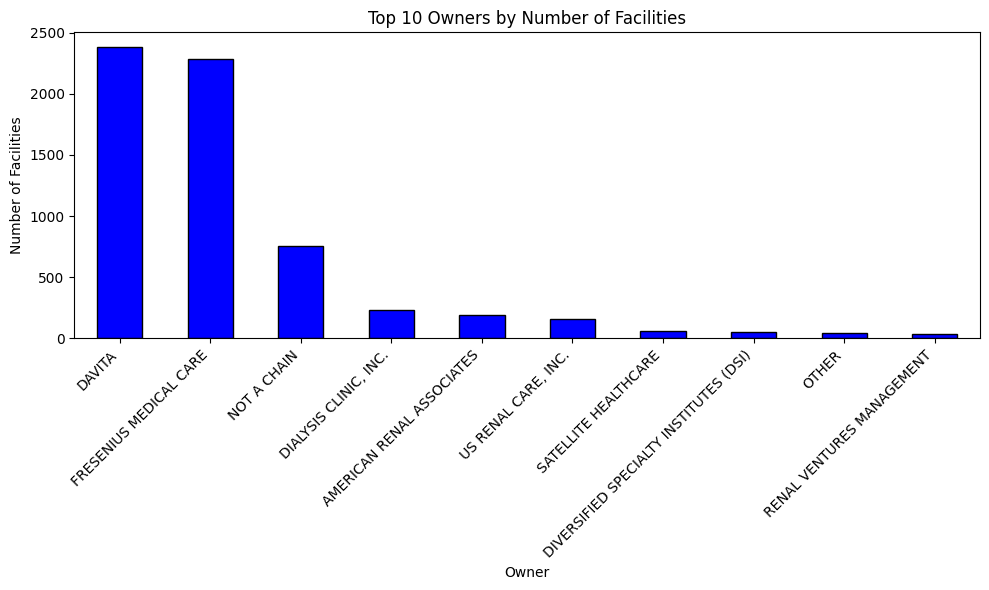

In [27]:
# Display the top 10 to bar chart
top_10_owners = owner_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_owners.plot(kind='bar', color='blue', edgecolor='black') # Bar plot
plt.title('Top 10 Owners by Number of Facilities') # Title of the plot
plt.xlabel('Owner') # X-axis label
plt.ylabel('Number of Facilities') # Y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show() # Display the plot

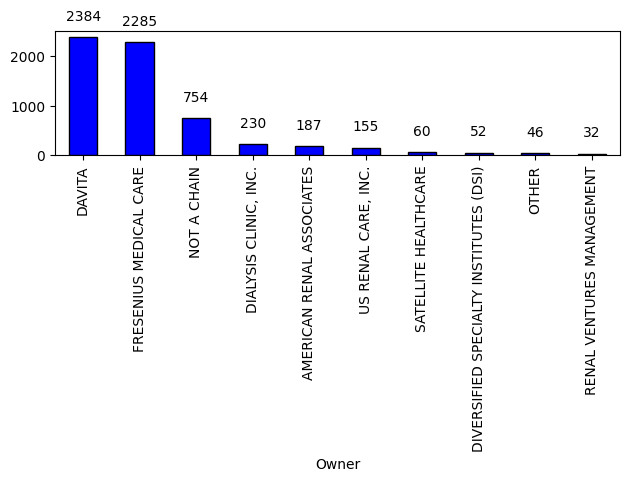

In [ ]:
# assign the plot to an object for further manipulation if needed
bar_plot = top_10_owners.plot(kind='bar', color='blue', edgecolor='black')

#add data labels
ax = bar_plot.axes
ax.bar_label(ax.containers[0], labels=owner_counts.head(10).values, label_type='edge', padding=10)
# padding is the distance between the label and the bar

plt.tight_layout()
plt.show()

In [ ]:
owner_counts.head(10)

Owner
DAVITA                       2384
FRESENIUS MEDICAL CARE       2285
NOT A CHAIN                   754
DIALYSIS CLINIC, INC.         230
AMERICAN RENAL ASSOCIATES     187
Name: count, dtype: int64

In [40]:
# add total performance score to the top 10 owner counts dataframe using merge
top_10_owners_df = pd.merge(df_filt, owner_counts, left_on='Owner', right_index=True)
top_10_owners_df.head()


,Facility Name,CMS Certification Number (CCN),Alternate CCN 1,Address 1,Address 2,City,State,Zip Code,Network,VAT Catheter Measure Score,...,STrR Improvement Period Numerator,STrR Improvement Period Denominator,STrR Measure Score Applied,National Avg STrR Measure Score,Total Performance Score,PY2018 Payment Reduction Percentage,CMS Certification Date,Owner,Date of Ownership Record Update,count
0,CHILDRENS HOSPITAL DIALYSIS,12306,013300,1600 7TH AVENUE SOUTH,-,BIRMINGHAM,AL,35233,8,No Score,...,NaN,NaN,NaN,5,70,No Reduction,11/17/1982,NOT A CHAIN,3/6/2012,754
1,FMC CAPITOL CITY,12500,-,255 S JACKSON STREET,-,MONTGOMERY,AL,36104,8,5,...,20.0,21.203,Achievement,5,64,No Reduction,9/1/1976,FRESENIUS MEDICAL CARE,3/6/2012,2285
2,GADSDEN DIALYSIS,12501,-,409 SOUTH FIRST STREET,-,GADSDEN,AL,35901,8,5,...,18.0,14.032,Achievement,5,49,No Reduction,9/1/1976,DAVITA,11/18/2009,2384
3,TUSCALOOSA UNIVERSITY DIALYSIS,12502,-,220 15TH STREET,-,TUSCALOOSA,AL,35401,8,7,...,23.0,23.161,Achievement,5,54,No Reduction,10/21/1977,DAVITA,11/17/2009,2384
4,PCD MONTGOMERY,12505,-,1001 FOREST AVENUE,-,MONTGOMERY,AL,36106,8,7,...,9.0,20.801,Achievement,5,71,No Reduction,12/14/1977,DAVITA,3/16/2012,2384


In [ ]:
print(df.index) # prints the index of the DataFrame
# clear the concept of right_index and left_on in merge

RangeIndex(start=0, stop=6825, step=1)


<Figure size 10000x9000 with 0 Axes>

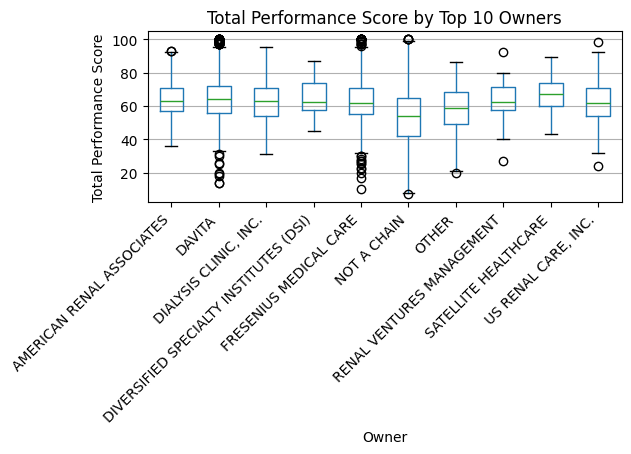

In [48]:
# box plot of total performance score by owner for the top 10 owners
plt.figure(figsize=(100, 90)) # Set the figure size in inches
top_10_owner_names = top_10_owners.index.tolist() # Get the names of the top 10 owners
df_top_10_owners = df_filt[df_filt['Owner'].isin(top_10_owner_names)] # Filter the DataFrame for only the top 10 owners
df_top_10_owners.boxplot(column='Total Performance Score', by='Owner', grid=False) # Box plot
plt.title('Total Performance Score by Top 10 Owners') # Title of the plot
plt.suptitle('') # Suppress the automatic 'Boxplot grouped by Owner' title
plt.xlabel('Owner') # X-axis label
plt.ylabel('Total Performance Score') # Y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y') # Add grid lines for better readability
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Q3 average total performance score for the top 10 owners
avg_performance_top_10 = df_top_10_owners.groupby('Owner')['Total Performance Score'].mean().sort_values(ascending=False)

print("Average Total Performance Score for Top 10 Owners:")
print(avg_performance_top_10)

Average Total Performance Score for Top 10 Owners:
Owner
SATELLITE HEALTHCARE                      66.816667
DIVERSIFIED SPECIALTY INSTITUTES (DSI)    64.865385
DAVITA                                    63.911493
AMERICAN RENAL ASSOCIATES                 63.529412
FRESENIUS MEDICAL CARE                    62.894530
DIALYSIS CLINIC, INC.                     62.821739
RENAL VENTURES MANAGEMENT                 62.406250
US RENAL CARE, INC.                       61.870968
OTHER                                     57.456522
NOT A CHAIN                               53.397878
Name: Total Performance Score, dtype: float64


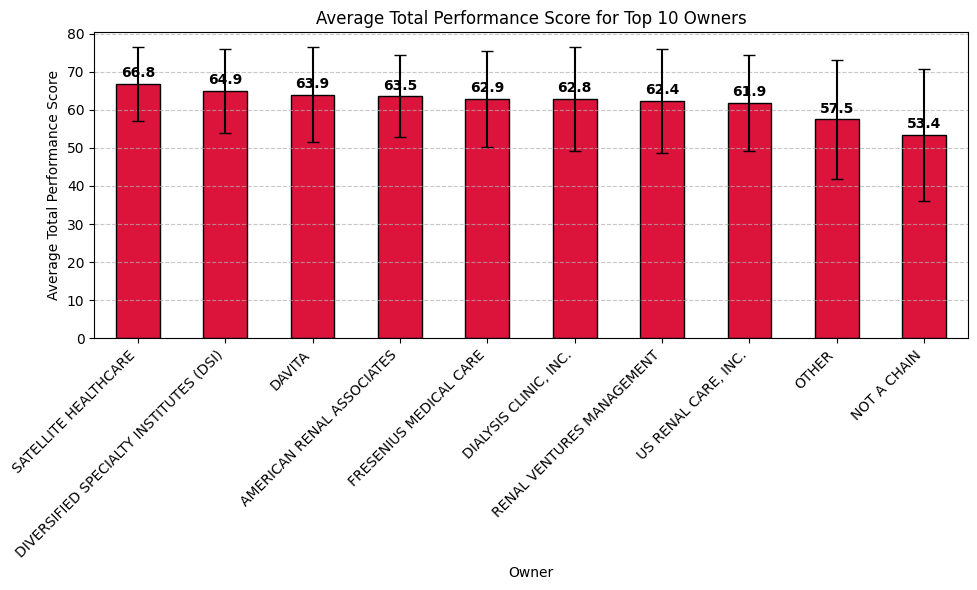

In [ ]:
# plot average total performance score for the top 10 owners in bar chart
# calculate standard deviation for error bars
sd_owner = df_top_10_owners.groupby('Owner')['Total Performance Score'].std().loc[avg_performance_top_10.index]

# Normal plot start here
plt.figure(figsize=(10, 6))
ax = avg_performance_top_10.plot(kind='bar', color='crimson', edgecolor='black', capsize=4, yerr=sd_owner) # Bar plot with error bars
plt.title('Average Total Performance Score for Top 10 Owners') # Title of the plot
plt.xlabel('Owner') # X-axis label
plt.ylabel('Average Total Performance Score') # Y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent clipping of labels

# -- add data labels --
for bar, label in zip(ax.patches, avg_performance_top_10.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{label:.1f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold') # Add data labels
# -- end add data labels --

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for better readability

plt.show() # Display the plot

In [67]:
# Q4 Create a correlation matrix heatmap
import seaborn as sns

In [79]:
# Select the features for correlation analysis
df_corr = df_filt[['Total Performance Score',
                   'VAT Catheter Measure Score',
                   'ICH CAHPS Measure Score',
                   'Vascular Access Combined Measure Score'
                   ]]

#Check data types
df_corr.dtypes

Total Performance Score                    int64
VAT Catheter Measure Score                object
ICH CAHPS Measure Score                   object
Vascular Access Combined Measure Score    object
dtype: object

In [80]:
# convert columns to numeric, forcing errors to NaN
df_corr = df_filt[df_filt['VAT Catheter Measure Score'] != 'No Score'].copy()
df_corr['VAT Catheter Measure Score'] = df_corr['VAT Catheter Measure Score'].astype(float)

df_corr = df_corr[df_corr['ICH CAHPS Measure Score'] != 'No Score'].copy()
df_corr['ICH CAHPS Measure Score'] = df_corr['ICH CAHPS Measure Score'].astype(float)

df_corr = df_corr[df_corr['Vascular Access Combined Measure Score'] != 'No Score'].copy()
df_corr['Vascular Access Combined Measure Score'] = df_corr['Vascular Access Combined Measure Score'].astype(float)

#we can also dropna since we have already filtered out 'No Score'
# we also can use loop to convert the columns faster
'''
columns_to_convert = ['VAT Catheter Measure Score', 'ICH CAHPS Measure Score', 'Vascular Access Combined Measure Score']
for column in columns_to_convert:
    df_corr = df_corr[df_corr[column] != 'No Score'].copy()
    df_corr[column] = pd.to_numeric(df_corr[column], errors='coerce')
'''    

df_corr = df_corr[['Total Performance Score',
                   'VAT Catheter Measure Score',
                   'ICH CAHPS Measure Score',
                   'Vascular Access Combined Measure Score'
                   ]]
df_corr.dtypes

Total Performance Score                     int64
VAT Catheter Measure Score                float64
ICH CAHPS Measure Score                   float64
Vascular Access Combined Measure Score    float64
dtype: object

In [ ]:
df_corr.head() #double check the data

,Total Performance Score,VAT Catheter Measure Score,ICH CAHPS Measure Score,Vascular Access Combined Measure Score
1,64,5.0,4.0,3.0
3,54,7.0,3.0,4.0
5,60,10.0,7.0,7.0
6,70,9.0,2.0,5.0
7,61,6.0,2.0,4.0


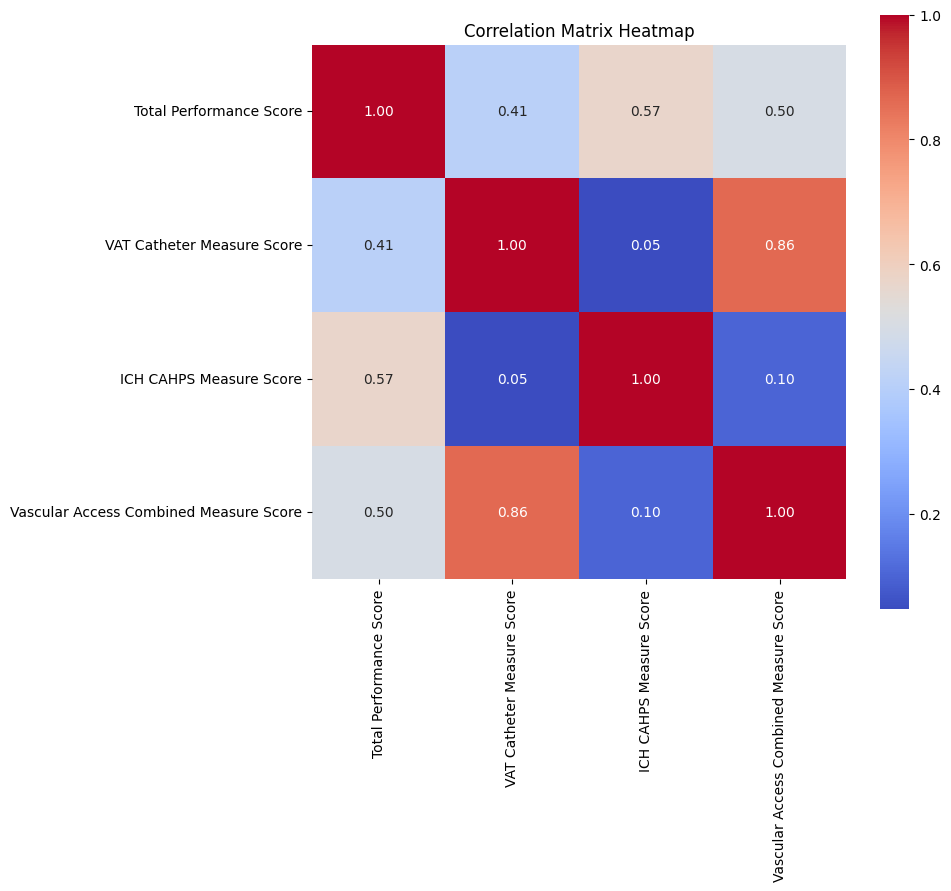

In [86]:
# Make heatmap
plt.figure(figsize=(10, 10))
correlation_matrix = df_corr.corr() # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) # Heatmap with annotations
plt.title('Correlation Matrix Heatmap') # Title of the plot
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show() # Display the plot